# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection
import seaborn as sns
sns.set(style="ticks")

# READING THE EXCEL FILE

In [2]:
df=pd.read_excel("D:\internshipstudio\project\Bank_Personal_Loan_Modelling.xlsx","Data")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# CHECKING THE COLUMNS

In [3]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# CALCULATING SHAPE OF EXCEL DATASET

In [4]:
print(df.shape)

(5000, 14)


TOTAL ROWS=5000
TOTAL COLUMNS=14

# CHECKING NULL VALUES FOR THE EXCEL DATASET

In [5]:
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

WE CALCULATED NULL VALUES FOR ID,AGE....WE GOT BOOL_SERIES=0 FOR EACH COLUMNS .IT MEANS DATASET DOES NOT CONTAIN ANY NULL VALUES.

# CHECKING DATATYPE OF EACH COLUMN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

# STATISTICAL SUMMARY

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The transpose() function is used to transpose index and columns. Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa.

# CALCULATING UNIQUE VALUES IN EACH COLUMN

In [8]:
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Number of people with zero mortgage?

In [9]:
df[df['Mortgage'] == 0]['Mortgage'].count()

3462

# Number of people with zero credit card spending per month?

In [10]:
df[df['CCAvg'] == 0]['CCAvg'].count()

106

# Value counts of all categorical columns.

In [11]:
unique_value=0
unique_value+= df[:].nunique() 
print(unique_value.sum())

6193


# Univariate and Bivariate analysis

# Influence of income and education on personal loan

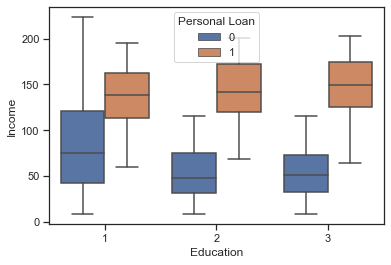

In [12]:
sns.boxplot( x=df["Education"], y=df["Income"],hue=df["Personal Loan"]);
plt.show()

 It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

# Influence of education and mortgage on personal loan

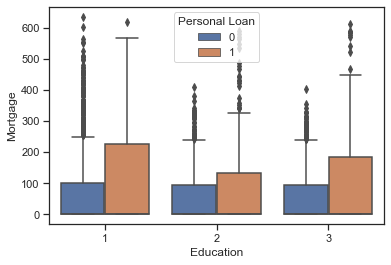

In [13]:
sns.boxplot( x=df["Education"], y=df["Mortgage"],hue=df["Personal Loan"]);
plt.show()

 From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

# Influence of SecuritiesAccount on personal loan

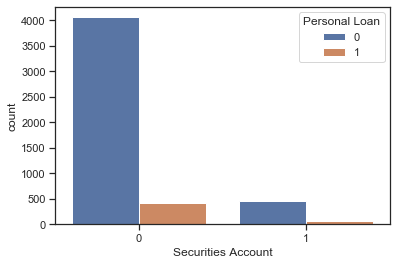

In [14]:
sns.countplot( x=df["Securities Account"],hue=df["Personal Loan"]);
plt.show()

Majority of customers who does not have loan have securities account

# Influence of family on personal loan

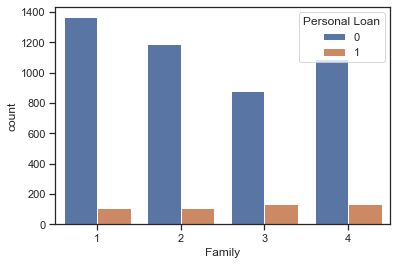

In [15]:
sns.countplot( x=df["Family"],hue=df["Personal Loan"]);
plt.show()

Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

# Influence of CDAccount on personal loan

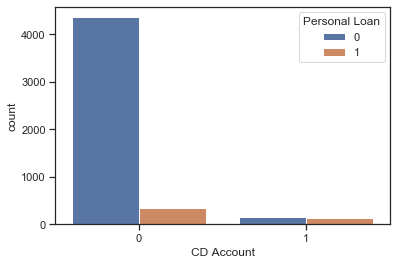

In [16]:
sns.countplot( x=df["CD Account"],hue=df["Personal Loan"]);
plt.show()

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

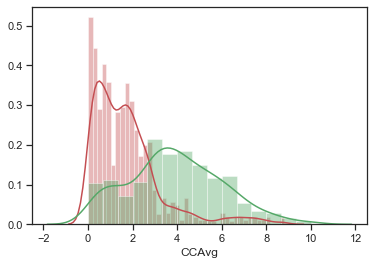

In [17]:
sns.distplot( df[df["Personal Loan"] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df["Personal Loan"] == 1]['CCAvg'], color = 'g')

In [18]:
print('Credit card spending of Non-Loan customers: ',df[df["Personal Loan"]==0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ',df[df["Personal Loan"]==1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

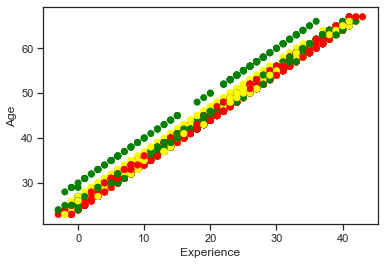

In [19]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(df['Experience'],df['Age'],c=df['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

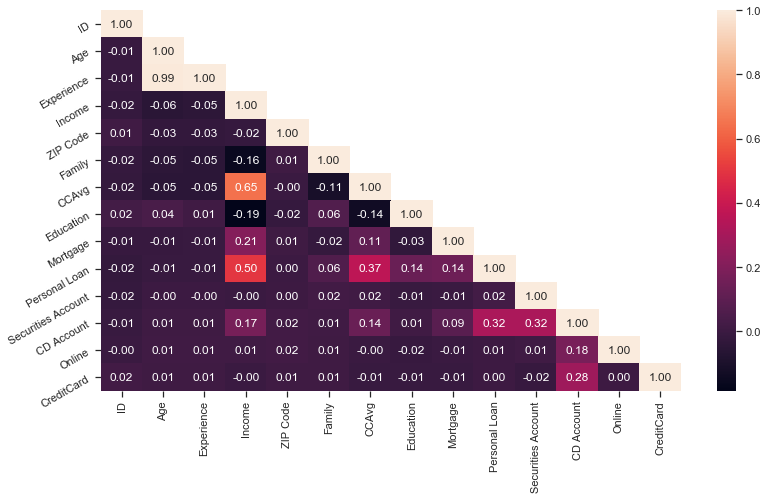

In [20]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Income and CCAvg is moderately correlated.
Age and Experience is highly correlated

# Influence of Family and Income on personal loan

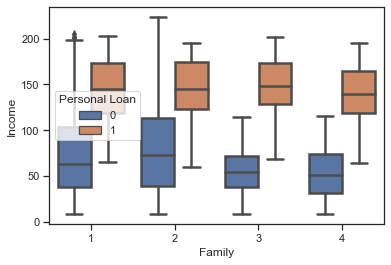

In [21]:
sns.boxplot( x=df["Family"], y=df["Income"],hue=df["Personal Loan"]);
plt.show()

Looking at the below above, families with income less than 100K are less likely to take loan,than families with high income

# SPLITTING DATA INTO TEST AND TRAIN DATA

In [22]:
testing=df.drop(['Experience' ,'ID','Personal Loan'],axis=1)
testing

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,1,0


In [23]:
x=testing
y=df['Personal Loan']

# INPUT METRICS

In [24]:
print(x.columns)

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')


# OUTPUT METRICS

In [25]:
output=y
output=output.to_frame()
output.columns

Index(['Personal Loan'], dtype='object')

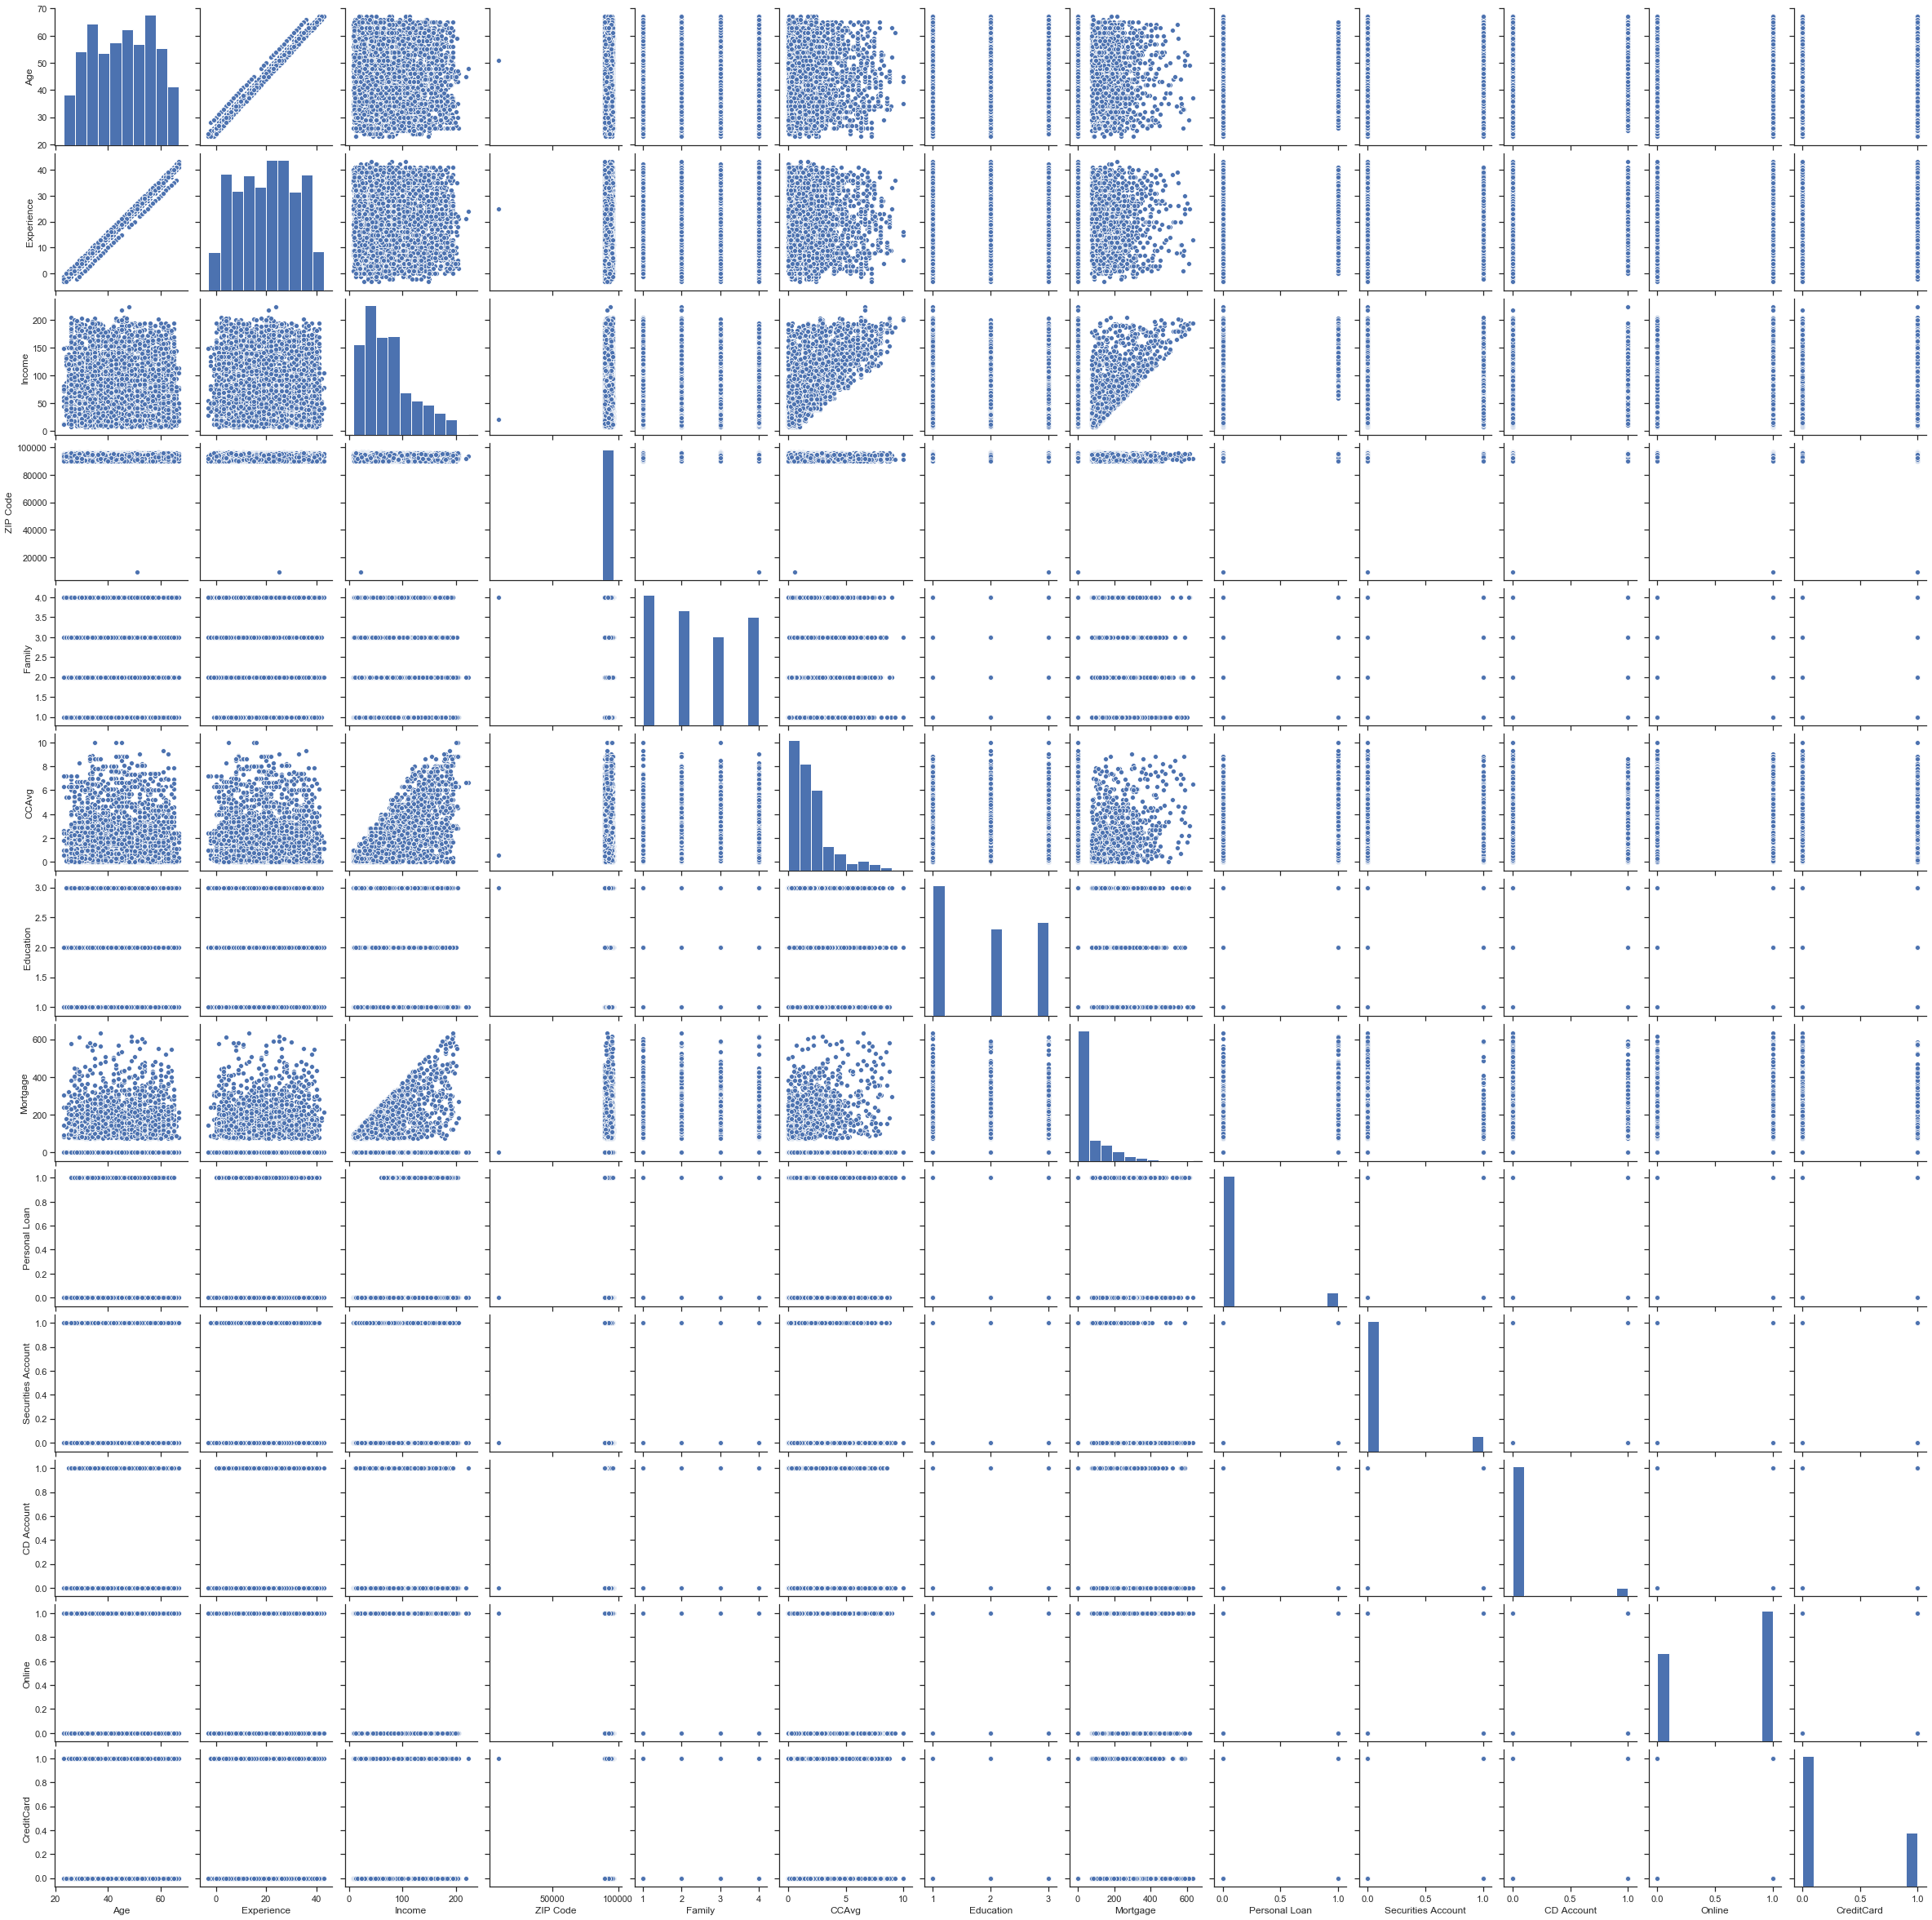

In [40]:
sns.pairplot(df.iloc[:,1:])

# APPLYING MODELS

# 1.LOGISTIC REGRESSION

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

Dividing dataset into testing(30%) and training data(70%)

In [38]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x,y)
print(model1.score(x_test,y_test))
model1.predict([[25,49,91107,4,1.6,1,0,1,0,0,0]])

0.9013333333333333


array([0], dtype=int64)

# 2.DECISION TREE CLASSIFIER

In [28]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x,y)
print(model2.score(x_test,y_test))

0.9813333333333333


# 3.NAIVE BAYES

In [29]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x, y)
print(model3.score(x_test,y_test))

0.8866666666666667


# 4.RANDOM FOREST CLASSIFIER

In [30]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=2, random_state=10)
model4.fit(x,y)
print(model4.score(x_test,y_test))

0.9073333333333333


# 5.KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
model5.fit(x,y)
print(model5.score(x_test,y_test))

0.8966666666666666


# 6.SUPPORT VECTOR CLASSIFIER

In [32]:
from sklearn.svm import SVC
model6 = SVC(kernel='linear')
model6.fit(x, y)
print(model6.score(x_test,y_test))

0.9066666666666666


In [33]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVC',  SVC(kernel='linear')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:29

LR: 0.912200 (0.016185)
DT: 0.981400 (0.005660)


c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.885600 (0.010385)
RF: 0.986800 (0.002857)


c:\users\anurag kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.898600 (0.008902)


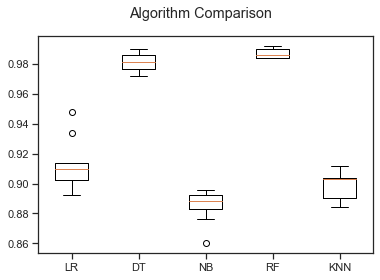

In [34]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A box plot is a graphical representation of statistical data based on the minimum, first quartile, median, third quartile, and maximum. The term “box plot” comes from the fact that the graph looks like a rectangle with lines extending from the top and bottom. Because of the extending lines, this type of graph is sometimes called a box-and-whisker plot.

# CONCLUSION

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.
LR: 0.912200 
DT: 0.982000
NB: 0.885600 
RF: 0.906200 
KNN:0.898600 

From the above result,it is clear that Decision Tree Algorithm is the best algorithm for predicting whether the customer will opt for personal loans.